In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



# 2. Dealing Missing Value

In [9]:
data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Ada beberapa cara untuk mengecek apakah dataset yang kita miliki memiliki nilai NaN atau missing.**

**Menggunakan atribut _.info()_**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Menggunakan atribut _.describe()_**

In [12]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Menggunakan atribut _.isnull()_**

In [13]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# 3. Handling Outliers

**Nilai outliers (atau yang biasa disebut dengan nilai pencilan) merupakan suatu nilai yang tidak normal. Dalam kata lain, nilai tersebut bernilai jauh sekali dari pusat data. Nilai pencilan ini dapat menyebabkan distorsi terhadap nilai yang asli.
Dampaknya jika tidak serius menanggulangi nilai outliers akan berdampak pada ketidaksesuaian data analisa dan ketidakakuratan model machine learning yang dikerjakan.**

# = Video Dari Sanbercode =

# Finding missing value

In [14]:
data = pd.read_csv('titanic.csv')

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cabin

In [18]:
df_cabin = data['Cabin']

In [19]:
persentase_missing_cabin = ((df_cabin.isnull().sum()/len(data)))*100

In [20]:
persentase_missing_cabin

77.10437710437711

In [22]:
data.drop('Cabin', axis=1, inplace=True)

## Embarked 

In [23]:
df_embarked = data['Embarked']

In [24]:
df_embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [25]:
df_embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
df_embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df_embarked.mode()[0]

'S'

In [29]:
data.fillna(df_embarked.mode()[0], inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [38]:
data['Age'][0]

AttributeError: 'float' object has no attribute 'dtype'

In [41]:
data['Age'].str.contains('S').sum()

177

In [43]:
# data['Age'].fillna(data['Age'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [57]:
data[data['Age'] == data['Age']] = 'S'

In [58]:
data['Age']

0          22.0
1          38.0
2          26.0
3          35.0
4          35.0
         ...   
886        27.0
887        19.0
888    47.83633
889        26.0
890        32.0
Name: Age, Length: 891, dtype: object

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(6), object(5)
memory usage: 76.7+ KB


# DATA PENCILAN (OUTLIERS)

In [60]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [100]:
umur = [21,22,23,24,21,20,19,7,25,26,24,27,28,29,31,100,20,28,24,25,26]
tinggi = [151,155,153,154,158,156,160,162,163,165,167,168,170,270,150,155,153,155,154,156,160]

df = pd.DataFrame({
    'Umur' : umur,
    'Tinggi(cm)' : tinggi
})

In [101]:
df

,Umur,Tinggi(cm)
0,21,151
1,22,155
2,23,153
3,24,154
4,21,158
5,20,156
6,19,160
7,7,162
8,25,163
9,26,165


## FINDING OUTLIERS

### 1. ZSCORES 

In [73]:
zscore_tinggi = ss.zscore(df['Tinggi(cm)'])
df.loc[np.where(zscore_tinggi > 3)]

,Umur,Tinggi(cm)
13,29,270


In [64]:
zscore_tinggi

0    -0.575155
1    -0.416231
2    -0.495693
3    -0.455962
4    -0.297038
5    -0.376500
6    -0.217575
7    -0.138113
8    -0.098382
9    -0.018920
10    0.060543
11    0.100274
12    0.179736
13    4.152850
14   -0.614887
15   -0.416231
16   -0.495693
17   -0.416231
18    1.133283
19   -0.376500
20   -0.217575
Name: Tinggi(cm), dtype: float64

In [65]:
np.where(zscore_tinggi > 3)

(array([13], dtype=int64),)

In [67]:
zscore_umur = ss.zscore(df['Umur'])
df.loc[np.where(zscore_umur > 3) ]

,Umur,Tinggi(cm)
15,100,155


### 2. IQR 

In [77]:
def get_lower_upper_bound(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound

def get_outlier_iqr(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound) | (x < lower_bound))]

get_outlier_iqr(df['Umur'].values)

array([  7, 100], dtype=int64)

### 3. BOXPLOT

<AxesSubplot:xlabel='Tinggi(cm)'>

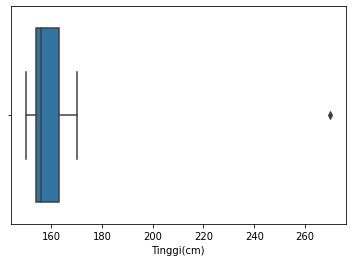

In [78]:
sns.boxplot(x='Tinggi(cm)', data=df)

In [119]:
zscore_tinggi = ss.zscore(df['Tinggi(cm)'])
b = df[['Tinggi(cm)']].loc[np.where(zscore_tinggi < 3)]
b

,Tinggi(cm)
0,151
1,155
2,153
3,154
4,158
5,156
6,160
7,162
8,163
9,165


### 4. REMOVE OUTLIERS USING IQR

In [109]:
Q1 = df['Umur'].quantile(0.25)
Q3 = df['Umur'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
print(Lower_bound, Upper_bound)

12.0 36.0


In [111]:
a = df[(df['Umur'] > Lower_bound) & (df['Umur'] < Upper_bound)]

,Umur,Tinggi(cm)
0,21,151
1,22,155
2,23,153
3,24,154
4,21,158
5,20,156
6,19,160
8,25,163
9,26,165
10,24,167


In [88]:
Upper_bound

18.0

In [98]:
df[(df['Umur'] > Lower_bound)]

,Umur,Tinggi(cm)
0,21,151
1,22,155
2,23,153
3,24,154
4,21,158
5,20,156
6,19,160
8,25,163
9,26,165
10,24,167


<AxesSubplot:xlabel='Umur'>

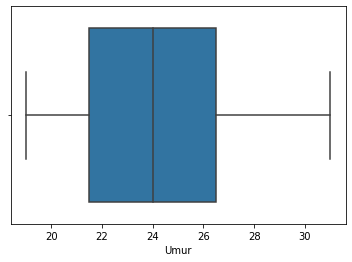

In [112]:
sns.boxplot(x='Umur', data=a)

<AxesSubplot:xlabel='Tinggi(cm)'>

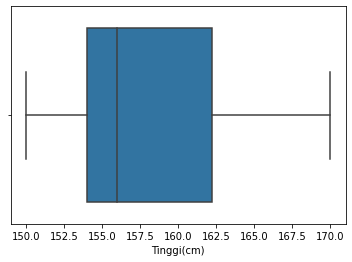

In [120]:
sns.boxplot(x='Tinggi(cm)',data=b)